# 18. 이미지 검출 (윤곽선)
## 윤곽선 (Contour) : 경계선을 연결한 선

In [1]:
import cv2
img = cv2.imread('./img/card.png')

target_img = img.copy() # 사본 이미지

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

contours, hierachy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) # 윤곽선 검출
# 윤곽선 정보, 구조 = 이미지, 윤곽선 찾는 모드, 윤곽선 찾을때 사용하는 근사치 방법

green = (0, 200, 0)
cv2.drawContours(target_img, contours, -1, green, 2) # 윤곽선 그리기
# 대상 이미지, 윤곽선 정보, 인덱스 (-1 이면 전체), 색깔, 두께

cv2.imshow('img', img)
cv2.imshow('gray', gray)
cv2.imshow('otsu', otsu)
cv2.imshow('contour', target_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

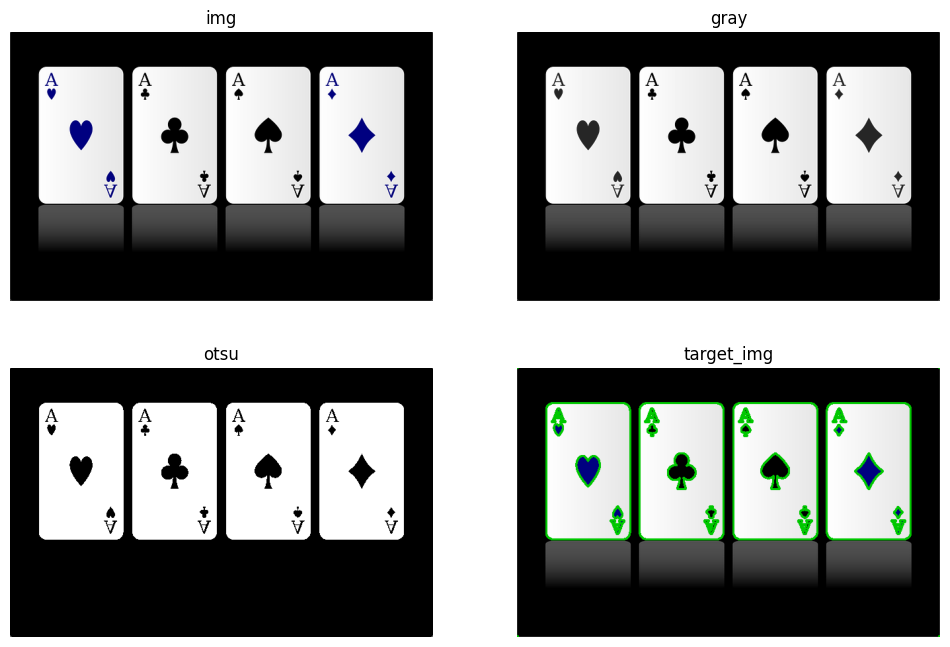

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

lst = [img, gray, otsu, target_img]
lst_t = ['img', 'gray', 'otsu', 'target_img']
idx = 0

for x in range(2):
    for y in range(2):
        if x == 1 and y == 2:
            ax[x, y].axis('off')
        else:
            ax[x, y].imshow(lst[idx], cmap='gray')
            ax[x, y].axis('off')
            ax[x, y].set_title(lst_t[idx])
            idx += 1

### 윤곽선 찾기 모드

1. cv2.RETR_EXTERNAL : 가장 외곽의 윤곽선만 찾음
1. cv2.RETR_LIST : 모든 윤곽선 찾음 (계측 정보 없음)
1. cv2.RETR_TREE : 모든 윤곽선 찾음 (계층 정보를 트리 구조로 생성)

In [3]:
import cv2
img = cv2.imread('./img/card.png')

target_img = img.copy() # 사본 이미지
target_img2 = img.copy() # 사본 이미지
target_img3 = img.copy() # 사본 이미지

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

contours_retr_list, hierachy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours_tree, hierachy = cv2.findContours(otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours_retr_external, hierachy = cv2.findContours(otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

green = (0, 200, 0)
sky = (200, 200, 0)
pink = (200, 0, 200)

retr_list = cv2.drawContours(target_img, contours_retr_list, -1, green, 2)
tree = cv2.drawContours(target_img2, contours_tree, -1, pink, 2)
retr_external = cv2.drawContours(target_img3, contours_retr_external, -1, sky, 2)

cv2.imshow('img', img)
cv2.imshow('retr_list', retr_list)
cv2.imshow('tree', tree)
cv2.imshow('retr_external', retr_external)

cv2.waitKey(0)
cv2.destroyAllWindows()

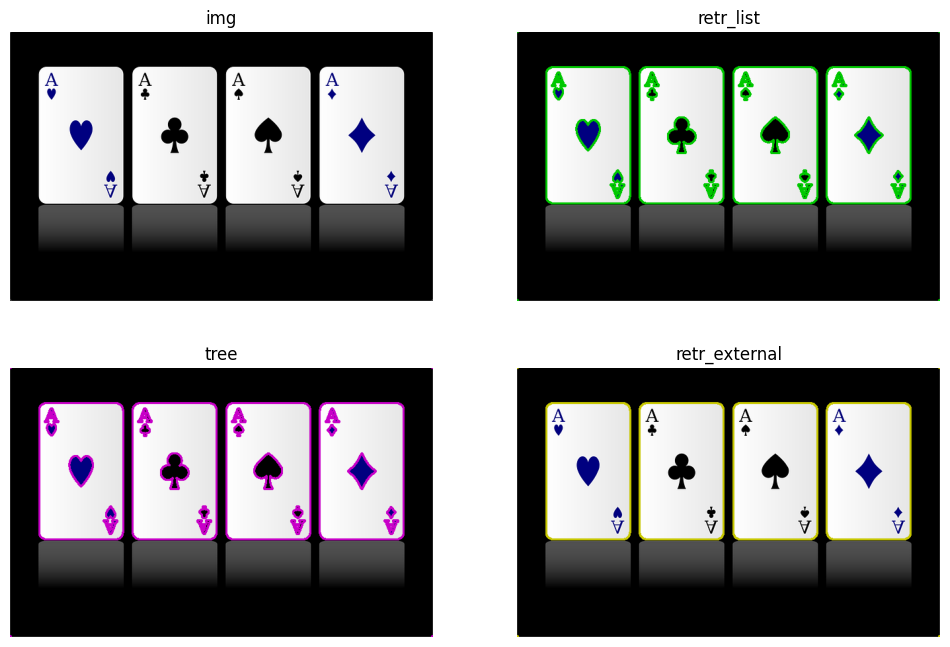

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

lst = [img, retr_list, tree, retr_external]
lst_t = ['img', 'retr_list', 'tree', 'retr_external']
idx = 0

for x in range(2):
    for y in range(2):
        if x == 1 and y == 2:
            ax[x, y].axis('off')
        else:
            ax[x, y].imshow(lst[idx], cmap='jet')
            ax[x, y].axis('off')
            ax[x, y].set_title(lst_t[idx])
            idx += 1